In [5]:
import numpy as np
import time
from tqdm import tqdm # esta librería es para mirar el progreso de un for
fragment_size = 200

# Secuencias de ADN

Las secuencias de ADN son cadenas largas y complejas de nucleótidos que contienen la información genética de los organismos vivos. Estas secuencias están formadas por cuatro bases nitrogenadas: adenina (A), citosina (C), guanina (G) y timina (T), que se combinan en un orden específico.

Mediante el estudio de las secuencias de ADN, los científicos pueden comprender la diversidad genética, identificar genes y mutaciones asociados a enfermedades, reconstruir la evolución de especies y realizar investigaciones en campos como la medicina, la biotecnología y la genómica.

<div>
<center>
<img src="https://innovativegenomics.org/wp-content/uploads/2018/04/DNA.png", width=200>
</center>
</div>

In [4]:
# Definimos unas secuencias
#Secuencia1 = "ACGTCGTCGAGCTAGCATCGATCAGNNNCATCATCNACTATACNNNNCATCATCATCTACTGCTACGACTACGAGAGAGCTACGACTACG"*cant_muestras
#Secuencia2 = "NGCNATCACGATGCATGCACTACGATCGACAGCATCGATCGATGCATCATGCATCGNATGCNTGASCSATCGACGTANGCACTGACNTGA"*cant_muestras
#Secuencia2 = Secuencia1

#SecuenciaLTR = "CACTAGACTAGACTAGCNAGCTACGCATGGCTACNCTACGACAGCTAGCTANCTATCNACTACNAGCTACTAGCTANNNACTANCTCGACTACGACTACACTGACCACTAGAC"*cant_muestras
#Secuencia1, Secuencia2 = SecuenciaLTR, SecuenciaLTR

# genómica comparativa

## Dot-plot
Los dot-plots son herramientas fundamentales en el análisis y comparación de secuencias de ADN. Se utilizan para visualizar y resaltar similitudes y diferencias entre dos o más secuencias genéticas. En un dot-plot, cada secuencia se representa en los ejes X e Y, y se colocan puntos en la matriz resultante para indicar las posiciones donde se encuentran coincidencias. Estos puntos forman patrones que pueden revelar información sobre la estructura y la función de las secuencias.

<div>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/3/33/Zinc-finger-dot-plot.png"></center>
</div>


## Algoritmo básico para realizar dot-plots

In [6]:
import time
import numpy as np
from tqdm import tqdm

begin = time.time()
dotplot = np.empty([len(merged_sequence_1), len(merged_sequence_2)],dtype=np.int8)
print("La matriz de resultado tiene tamaño: ", dotplot.shape)

for i in tqdm(range(dotplot.shape[0])):
    for j in range(dotplot.shape[1]):
        if merged_sequence_1[i] == merged_sequence_2[j]:
            dotplot[i, j] = 1
        else:
            dotplot[i, j] = 0

print(f"\nEl código se ejecutó en: {time.time() - begin} segundos")

La matriz de resultado tiene tamaño:  (17760, 21200)


100%|██████████| 17760/17760 [00:49<00:00, 360.10it/s]


El código se ejecutó en: 49.32348275184631 segundos


# Visualizar el dotplot

In [7]:
import matplotlib.pyplot as plt
def draw_dotplot(matrix, fig_name='dotplot.svg'):
  plt.figure(figsize=(5,5))
  plt.imshow(matrix, cmap='Greys',aspect='auto')

  plt.ylabel("Secuencia 1")
  plt.xlabel("Secuencia 2")
  plt.savefig(fig_name)

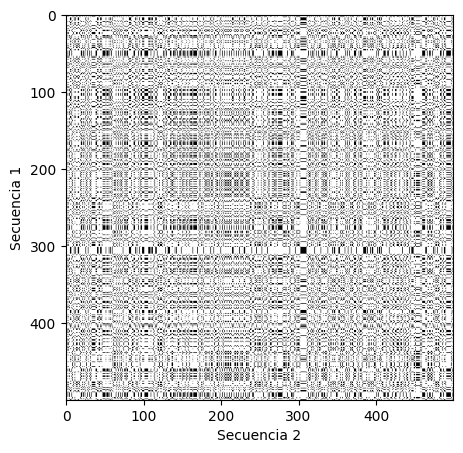

In [8]:
draw_dotplot(dotplot[:500,:500 ])


# Comparemos la misma secuencia ⬆
# Cambiemos la cantidad de muestras ⬆ 

# Ahora vamos a realizar la paralelización con MULTIPROCESSING

La matriz de resultado tiene tamaño:  (17760, 21200)

 El código se ejecutó en: 19.88295078277588 segundos


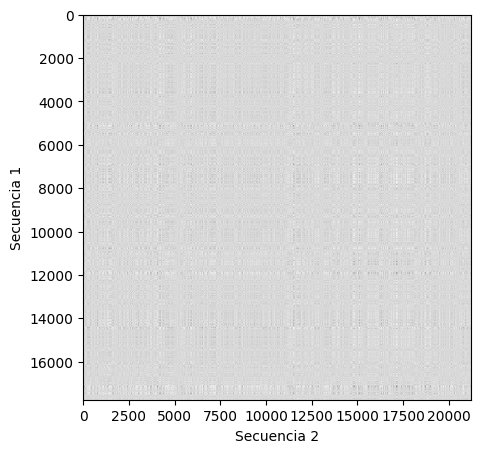

In [9]:
import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt

Secuencia1 = merged_sequence_1
Secuencia2 = merged_sequence_2

def worker(args):
    i, Secuencia1, Secuencia2 = args
    return [Secuencia1[i] == Secuencia2[j] for j in range(len(Secuencia2))]

def parallel_dotplot(Secuencia1, Secuencia2, threads=mp.cpu_count()):
    with mp.Pool(processes=threads) as pool:
        result = pool.map(worker, [(i, Secuencia1, Secuencia2) for i in range(len(Secuencia1))])
    return result

begin = time.time()
dotplot = np.array(parallel_dotplot(Secuencia1, Secuencia2,4))

print("La matriz de resultado tiene tamaño: ", dotplot.shape)
print(f"\n El código se ejecutó en: {time.time() - begin} segundos")

## Vamos a visualizar el dotplot
draw_dotplot(dotplot,fig_name='dotplot_parallel.svg')


## Realicemos un ejercicio de análisis de rendimiento 
También probemos con diferentes longitudes de secuencias como es el comportamiento  y  y el escalamiento del algoritmo. 

*   Vamos a analizar el desempeño del programa paralelo respecto al secuencial. (métricas de desempeño)  
*   Revisemos la ley de amdahl
*   Veamos el escalamiento del algoritmo.

In [10]:
#@title Funciones para realizar el análisis
#@markdown draw_dotplot(matrix) \\
#@markdown dotplot_secuencial(Secuencia1, Secuencia2) \\
#@markdown dotplot_multiprocessing(Secuencia1, Secuencia2)

def draw_dotplot(matrix,fig_name='dotplot.svg'):
  plt.figure(figsize=(5,5))
  plt.imshow(matrix, cmap='Greys',aspect='auto')

  plt.ylabel("Secuencia 1")
  plt.xlabel("Secuencia 2")
  plt.savefig(fig_name)

def worker(args):
    i, Secuencia1, Secuencia2 = args
    return [Secuencia1[i] == Secuencia2[j] for j in range(len(Secuencia2))]

def parallel_dotplot(Secuencia1, Secuencia2,threads=mp.cpu_count()):
    with mp.Pool(processes=threads) as pool:
        result = pool.map(worker, [(i, Secuencia1, Secuencia2) for i in range(len(Secuencia1))])
    return result

def dotplot_secuencial(sec1, sec2):
  dotplot = np.empty([len(sec1),len(sec2)])
  #print("La matriz de resultado tiene tamaño: ", dotplot.shape)

  for i in range(dotplot.shape[0]):
    for j in range(dotplot.shape[1]):
      if sec1[i] == sec2[j]:
        dotplot[i,j] = 1
      else:
        dotplot[i,j] = 0

  return dotplot

def dotplot_multiprocessing(sec1,sec2,threads=mp.cpu_count()):
  dotplot = np.array(parallel_dotplot(sec1, sec2,threads))
  return dotplot

In [13]:
# Veamos el tiempo con 1 procesador
begin_secuencial = time.time()
dotplot_secuencial(Secuencia2, Secuencia2)
end_secuencial = time.time()

print(f"el tiempo secuencial es: {end_secuencial-begin_secuencial} ")

begin_paralelo = time.time()
dotplot_multiprocessing(Secuencia2, Secuencia2,2)
end_paralelo = time.time()

print(f"el tiempo paralelo es: {end_paralelo-begin_paralelo} ")

el tiempo secuencial es: 38.774909257888794 
el tiempo paralelo es: 27.99022674560547 


In [14]:
n_proc = [1,2,4,6]
times = []  
for i in n_proc:
    
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia2, Secuencia2,i)
    end_paralelo = time.time()
    times.append(end_paralelo-begin_paralelo)   
    print("Dotplot con ",i," procesadores, timepo: ",end_paralelo-begin_paralelo)

Dotplot con  1  procesadores, timepo:  38.473968267440796
Dotplot con  2  procesadores, timepo:  28.187666416168213
Dotplot con  4  procesadores, timepo:  24.55870270729065
Dotplot con  6  procesadores, timepo:  23.107414484024048
Dotplot con  8  procesadores, timepo:  23.328850746154785


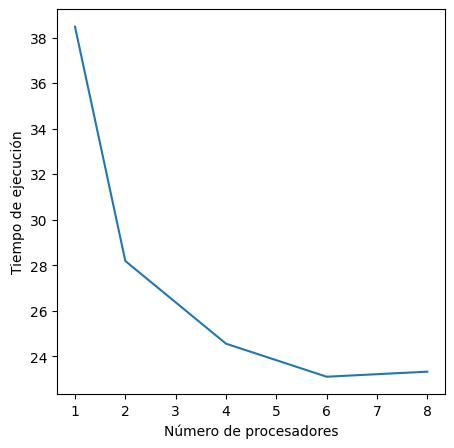

In [15]:
plt.figure(figsize=(5,5))
plt.plot(n_proc,times)  
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")
plt.show()

In [16]:
acel = [times[0]/i for i in times]
efic = [acel[i]/n_proc[i] for i in range(len(n_proc))]
print("Aceleración: ",acel)
print("Eficiencia: ",efic)

Aceleración:  [1.0, 1.364922079728191, 1.5666124031876967, 1.6650053295248952, 1.6492011838080936]
Eficiencia:  [1.0, 0.6824610398640955, 0.39165310079692417, 0.2775008882541492, 0.2061501479760117]


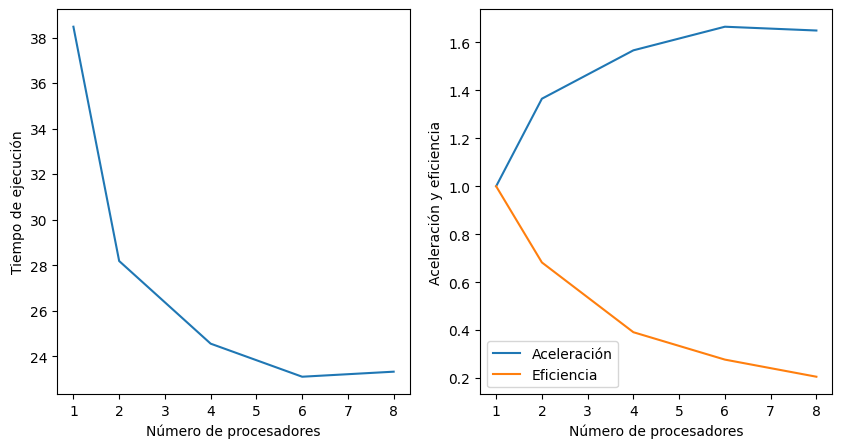

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_proc,times)
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")
plt.subplot(1,2,2)
plt.plot(n_proc,acel)
plt.plot(n_proc,efic)
plt.xlabel("Número de procesadores")
plt.ylabel("Aceleración y eficiencia")
plt.legend(["Aceleración","Eficiencia"])
plt.show()


In [19]:
print("Aceleración Maxima: ",max(acel))

Aceleración Maxima:  1.6650053295248952


### Miremos el escalamiento del algoritmo (Débil y fuerte)

In [22]:
n_proc = [1, 2, 4, 6]
strong_times = []  
weak_times = []

In [23]:

for i in n_proc:
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia2, Secuencia2, i)
    end_paralelo = time.time()
    strong_times.append(end_paralelo - begin_paralelo)   
    print("Dotplot con ", i, " procesadores, tiempo: ", end_paralelo - begin_paralelo)

Dotplot con  1  procesadores, tiempo:  38.468674659729004
Dotplot con  2  procesadores, tiempo:  28.5871365070343
Dotplot con  4  procesadores, tiempo:  23.78217577934265
Dotplot con  6  procesadores, tiempo:  23.15746808052063


In [24]:
for i in n_proc:
    Secuencia = Secuencia2[:len(Secuencia2)*i]  # Incrementa el tamaño de la secuencia.
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia, Secuencia, i)
    end_paralelo = time.time()
    weak_times.append(end_paralelo - begin_paralelo)   
    print("Dotplot con ", i, " procesadores, tiempo: ", end_paralelo - begin_paralelo)

Dotplot con  1  procesadores, tiempo:  38.55905890464783
Dotplot con  2  procesadores, tiempo:  28.58476495742798
Dotplot con  4  procesadores, tiempo:  23.857515335083008
Dotplot con  6  procesadores, tiempo:  23.260843753814697


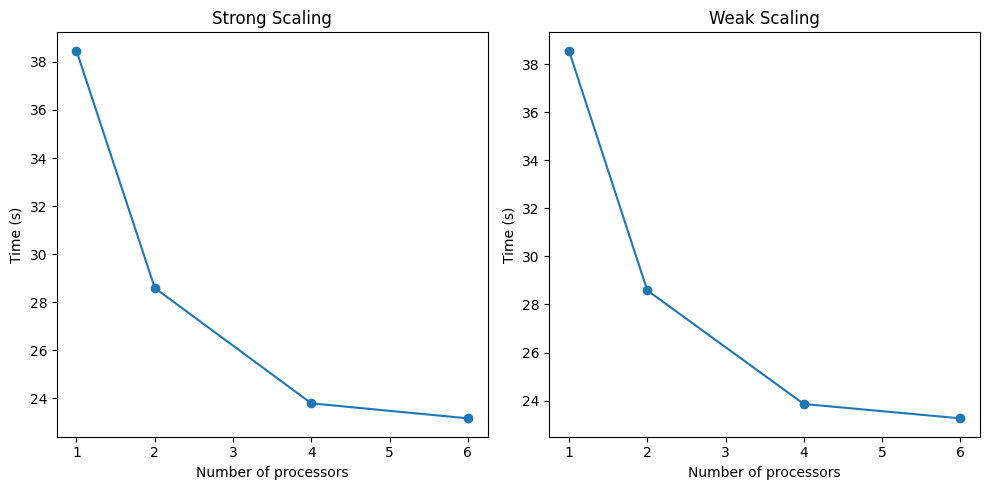

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_proc, strong_times, marker='o')
plt.title("Strong Scaling")
plt.xlabel("Number of processors")
plt.ylabel("Time (s)")

plt.subplot(1, 2, 2)
plt.plot(n_proc, weak_times, marker='o')
plt.title("Weak Scaling")
plt.xlabel("Number of processors")
plt.ylabel("Time (s)")

plt.tight_layout()
plt.show()

# Actividad:

Realizar el análisis de tiempo de la estrategia teniendo en cuenta el tiempo que le toma al programa guardar la imágen de salida.

# Ahora miremos la estrategia de paralelización con MPI4PY

In [27]:
!mpirun -n 1 python3 dotplotMPI_1.py

Tiempo total de ejecución: 373.6808400154114 segundos


In [28]:
!mpirun -n 2 python3 dotplotMPI_sln.py

Tiempo total de ejecución: 200.45847630500793 segundos


In [29]:
!mpirun -n 4 python3 dotplotMPI_sln.py

Tiempo total de ejecución: 104.33040618896484 segundos


In [30]:
!mpirun -n 6 python3 dotplotMPI_sln.py

Tiempo total de ejecución: 71.93230390548706 segundos


In [31]:
!mpirun -n 8 python3 dotplotMPI_sln.py

--------------------------------------------------------------------------
There are not enough slots available in the system to satisfy the 8
slots that were requested by the application:

  python3

Either request fewer slots for your application, or make more slots
available for use.

A "slot" is the Open MPI term for an allocatable unit where we can
launch a process.  The number of slots available are defined by the
environment in which Open MPI processes are run:

  1. Hostfile, via "slots=N" clauses (N defaults to number of
     processor cores if not provided)
  2. The --host command line parameter, via a ":N" suffix on the
     hostname (N defaults to 1 if not provided)
  3. Resource manager (e.g., SLURM, PBS/Torque, LSF, etc.)
  4. If none of a hostfile, the --host command line parameter, or an
     RM is present, Open MPI defaults to the number of processor cores

In all the above cases, if you want Open MPI to default to the number
of hardware threads instead of the number o

# Carguemos los archivos FASTA que contienen las secuencias

In [1]:
from Bio import SeqIO

def merge_sequences_from_fasta(file_path):
    sequences = []  # List to store all sequences
    for record in SeqIO.parse(file_path, "fasta"):
        # `record.seq` gives the sequence
        sequences.append(str(record.seq))
    return "".join(sequences)

In [2]:
file_path_1 = "/home/nico/Documents/Universidad/2023-1/Concurrente/SesiónDotplotConcurrente/archivosParaDotplot/E_coli.fna"
file_path_2 = "/home/nico/Documents/Universidad/2023-1/Concurrente/SesiónDotplotConcurrente/archivosParaDotplot/Salmonella.fna"

merged_sequence_1 = merge_sequences_from_fasta(file_path_1) # estas son las secuencias que se van a utilizar para el dotplot
merged_sequence_2 = merge_sequences_from_fasta(file_path_2)


In [3]:
print("longitud Archivo 1:", len(merged_sequence_1))
print("longitud Archivo 2:", len(merged_sequence_2))

longitud Archivo 1: 17760
longitud Archivo 2: 21200


In [4]:
print("longitud Archivo 1:", len(merged_sequence_1)/100000)
print("longitud Archivo 2:", len(merged_sequence_2)/100000)

longitud Archivo 1: 0.1776
longitud Archivo 2: 0.212
